In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # reading the dataset
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Cabin'].isnull().sum()/len(df['Cabin'])*100

77.10437710437711

As 77% of data in Cabin column is missing, the column can be dropped from the dataset

In [7]:
#dropping Cabin column
df.drop(columns=['Cabin'],inplace=True)

Text(0.5, 1.0, 'Age distribution-plot')

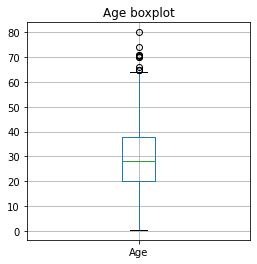

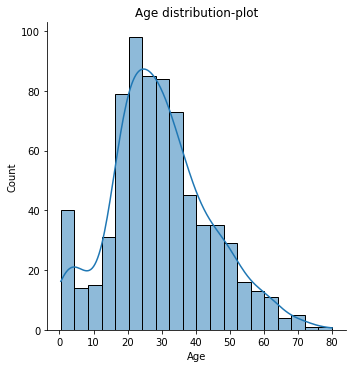

In [8]:
# to determine how missing data in Age column needs to be filled we need to check how the available data points are distributed
#checking using boxplot
plt.figure(figsize=(4,4))
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
#checking using distribution plot
sns.displot(data=df, x="Age", kde=True)
plt.title('Age distribution-plot',fontsize=12)

We can use median of age to fill in the missing value as the age distribution is slightly skewed to the right

In [9]:
# filling of missing values
df.fillna({'Age':df['Age'].median(),'Embarked':df['Embarked'].mode()[0]},inplace=True)
df.isna().sum() # confirming if all null values are filled

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

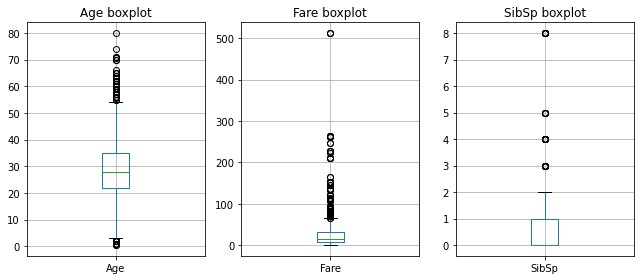

In [10]:
#outlier handling
#checking for outliers in columns Age, Fare, SibSp
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,3,2)
df.boxplot(column='Fare')
plt.title('Fare boxplot',fontsize=12)
plt.subplot(1,3,3)
df.boxplot(column='SibSp')
plt.title('SibSp boxplot',fontsize=12)
plt.tight_layout()

In [11]:
#manipulating outliers using interquartile rule
outliers_list=['Age','Fare','SibSp']
for i in outliers_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    df[i].where(df[i] >=l_lim,l_lim, inplace=True)  #replacing all lower outliers with lower limit
    df[i].where(df[i] <=u_lim,u_lim, inplace=True)  #replacing all upper outliers with upper-limit

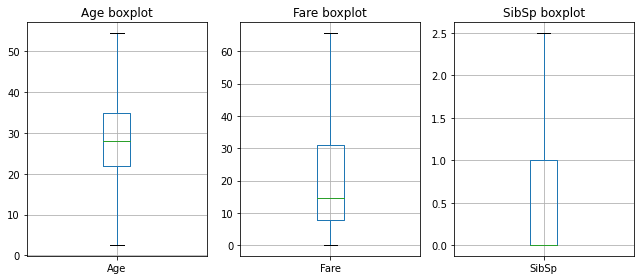

In [12]:
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
df.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,3,2)
df.boxplot(column='Fare')
plt.title('Fare boxplot',fontsize=12)
plt.subplot(1,3,3)
df.boxplot(column='SibSp')
plt.title('SibSp boxplot',fontsize=12)
plt.tight_layout()

In [13]:
# feature selection

In [14]:
# dropping columns that are not necessary
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


In [15]:
#feature engineering on Age column
df['Age'].nunique()

65

In [16]:
df['Age'].unique()

array([22. , 38. , 26. , 35. , 28. , 54. ,  2.5, 27. , 14. ,  4. , 54.5,
       20. , 39. , 31. , 34. , 15. ,  8. , 19. , 40. , 42. , 21. , 18. ,
        3. ,  7. , 49. , 29. , 28.5,  5. , 11. , 45. , 17. , 32. , 16. ,
       25. , 30. , 33. , 23. , 24. , 46. , 37. , 47. , 14.5, 32.5, 12. ,
        9. , 36.5, 51. , 40.5, 44. , 50. , 36. , 45.5, 20.5, 41. , 52. ,
       23.5, 43. , 10. , 13. , 48. , 53. , 24.5,  6. , 30.5, 34.5])

In [17]:
df['Age']=pd.cut(df['Age'],bins=[1,3,10,17,25,40,64,80],labels=['Toddler','Kid','Teenager','Youngster','Adult','Middle Age','Elderly'])
df['Age'] = df['Age'].astype('object') #converting from type category to object
df['Age'].value_counts()

Adult         440
Youngster     188
Middle Age    150
Teenager       49
Kid            34
Toddler        30
Name: Age, dtype: int64

<AxesSubplot:>

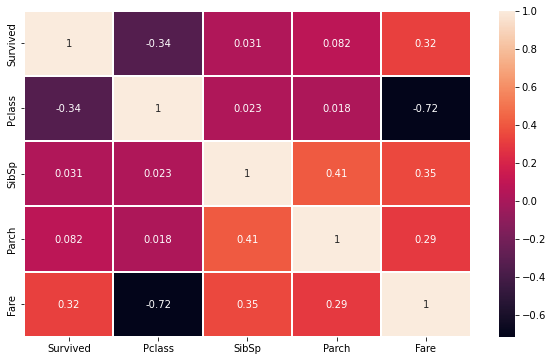

In [18]:
# checking correlation between the features
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(),annot=True,linewidth=0.2)

In [19]:
# Features target separation
X=df.drop('Survived',axis=1)
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [20]:
y=df['Survived']

In [21]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
#one hot encoding
X=pd.get_dummies(X) #dummy-coding categorical columns
X.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age_Adult,Age_Kid,Age_Middle Age,Age_Teenager,Age_Toddler,Age_Youngster,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,0,7.2500,0,1,0,0,0,0,0,1,0,0,1
1,1,1.0,0,65.6344,1,0,1,0,0,0,0,0,1,0,0
2,3,0.0,0,7.9250,1,0,1,0,0,0,0,0,0,0,1
3,1,1.0,0,53.1000,1,0,1,0,0,0,0,0,0,0,1
4,3,0.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1


In [23]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [24]:
# scaling of features
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
X_train = min_max.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = min_max.transform(X_test)
X_test = pd.DataFrame(X_test)

In [25]:
#importing the modelling libraries
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score,  f1_score
#defining functions for evaluation of various models
def get_confusion_matrix(y_test,prediction):
    conf_matrix = confusion_matrix(y_test,prediction)
    return conf_matrix
def get_accuracy_score(y_test,prediction):
    accuracy = accuracy_score(y_test,prediction)
    return accuracy
def get_f1_score(y_test,prediction):
    f1 = f1_score(y_test,prediction)
    return f1

In [26]:
# Model building and evaluation

In [27]:
#Gaussian NB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[118  39]
 [ 26  85]]
Accuracy : 0.7574626865671642
F1-score : 0.723404255319149


In [28]:
#Bernoulli NB
bnb=BernoulliNB()
bnb.fit(X_train, y_train)
prediction = bnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[130  27]
 [ 32  79]]
Accuracy : 0.7798507462686567
F1-score : 0.7281105990783409


In [29]:
#Multinomial NB
mnb=MultinomialNB()
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[134  23]
 [ 32  79]]
Accuracy : 0.7947761194029851
F1-score : 0.7417840375586854


The Multinomial Naive Bayes classifier has given the best accuracy of 79.47%